# SUPERVISED LEARNING FOR WINE CLASSIFICATION



*   #### Binary multi-classification: Machine identifying between white and red.
*   #### Multi-class classification: Machine identifying between different ranges of quality. 

 
*Contributors:* Deniz Hepdogan, Adriana López Hernández and Valeria Orozco Castiblanco.


We decided to implement supervised learning on a multilayer perceptron on two different tasks:



1.   First, a binary classification in which the possible outcomes were the type of wine, either white or red. 
2.   Second, a multi-class classification in which the possible outcomes were the quality of wine, on a scale from 1 to 6. 




To begin, we import the neccessary modules:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import clear_output
import itertools 

# Data transformation imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model imports
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Model evaluation imports
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# We import the dataset from a .csv document (in the cloud)
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1r-kRQElRLgx9vi6lLDNIOsArbnshIcxv' -O winequalityN.csv

# We use p tag to download into a directory
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1r-kRQElRLgx9vi6lLDNIOsArbnshIcxv' -O winequalityN.csv && mkdir mkdir -p ~/data/directory_name
clear_output()

# We create a Dataframe with the information from the dataset
data = pd.read_csv('winequalityN.csv')
wine_data = pd.DataFrame(data)

# We clean the dataset: In case we have empty rows, we eliminate them
wine_data = wine_data.dropna()
wine_data = wine_data.reset_index(drop=True)

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [ ]:
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


* `Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality` contain the features that are used to classify the wines in either red or white. 

* `type`: Contains the names for the classes

In [ ]:
# We clean the dataset: In case we have empty rows, we eliminate them
wine_data = wine_data.dropna()
wine_data = wine_data.reset_index(drop=True)

# We separate the data in training (input) and testing (output) 
wine_input_data = wine_data.drop("type", axis=1)
wine_output_data = wine_data["type"]

The data is divided into train and test with the `train_test_split` function


*   `wine_input_data` contains the data used for training
*   `wine_output_data` contains the labels "red" or "white"


In [ ]:
wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(wine_input_data, wine_output_data, random_state=6)

Data is scaled using `StandardScaler()`

In [ ]:
# We scale our data
scaler = StandardScaler().fit(wine_input_data)

wine_x_train = scaler.transform(wine_x_train)
wine_x_test = scaler.transform(wine_x_test)

## Multilayer Perceptron

We implement a multi-layered perceptron using backpropagation.

### Building the `MLPClassifier` model
We set it at 10 units in the hidden layer:

In [ ]:
#Build an multilayer perceptron using MLPClassifier function from sklearn.neural_network
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)

### Training the `MLPClassifier` model for binary classification


In [ ]:
#Train the model
mlp.fit(wine_x_train, wine_y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

###Testing the `MLPClassifier` model for binary classification





In [ ]:
#Test
predictions = mlp.predict(wine_x_test)

#Print predictions
print(predictions)

['red' 'red' 'white' ... 'white' 'white' 'white']


### Graph the loss function for the MLP model

0.9983579638752053
Iterations:  187


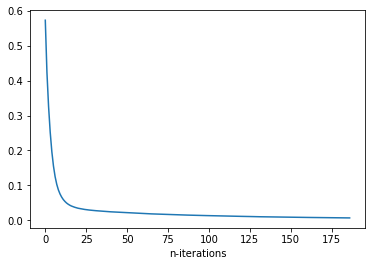

In [ ]:
print (mlp.score(wine_x_train,wine_y_train))
plt.plot(mlp.loss_curve_)
plt.xlabel('n-iterations')
print('Iterations: ', len(mlp.loss_curve_))

###Evaluate the results of the model for binary classification

In [ ]:
#Build a variable report and use classification_report function
c_report = classification_report(wine_y_test, predictions)

#print results
print("Classification report for classifier %s:\n%s\n"
      % (mlp, c_report))

cfn_matrix = confusion_matrix(wine_y_test, predictions)

print("Confusion matrix:\n%s" % cfn_matrix)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000):
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       393
       white       0.99      1.00      1.00      1232

    accuracy                           1.00      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625


Confusion matrix:
[[ 386    7]
 [   0 1232]]


In [ ]:
print('Training', wine_input_data.shape)
print('Test', wine_output_data.shape)

Training (6497, 12)
Test (6497,)


In [ ]:
#Define a function that plots the confusion matrix without normalization to verify if results are accurate or not
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:1.2f}".format(cm[i, j]),
                 horizontalalignment="center",
                 # For the purpose of having a clearer visualization, make only the largest value white
                 color="white" if cm[i, j] > 0.99 else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


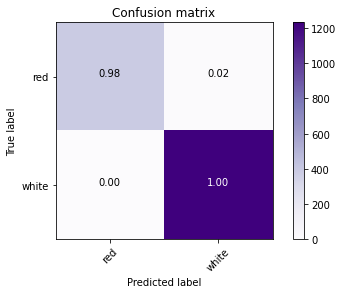

In [ ]:
#Plot the matrix
cnf_matrix = confusion_matrix(wine_y_test, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['red', 'white'], normalize=True)

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

### Model Evaluation

In [ ]:
print("Accuracy of wine type classification with MLP: ", accuracy(cfn_matrix))


Accuracy of wine type classification with MLP:  0.9956923076923077


The accuracy for the model is 99%. It learnt and can therefore identify with the given data if the wine is either red or white.




---



# Wine Quality Classification
The quality feature of the dataset is measured with discrete values (3-9), so we will use classification and not regression.


In [ ]:
# We overwrite the Dataframe with the information from the original dataset
data = pd.read_csv('winequalityN.csv')
wine_data = pd.DataFrame(data)

# We clean the dataset: In case we have empty rows, we eliminate them
wine_data = wine_data.dropna()
wine_data = wine_data.reset_index(drop=True)

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


* `Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, white and red` contain the features that are used to classify the quality of the wines. 

* `quality`: Contains the the classes for the wine quality.

In [ ]:
# We separate the data in training (input) and testing (output) 
wine_input_data = wine_data.drop("quality", axis=1)
wine_output_data = wine_data["quality"]

In [ ]:
white = []
red = []
for i in range(len(wine_input_data)):
    # We create new boolean columns for the types of wine: "white" and "red"
    if wine_input_data["type"][i] == "white":
        white.append(1)
        red.append(0)
    else:
        white.append(0)
        red.append(1)

wine_input_data["white"] = white
wine_input_data["red"] = red
wine_input_data = wine_input_data.drop("type", axis=1)

The data is divided into train and test with the `train_test_split` function:

*   `wine_input_data` contains the data used for training
*   `wine_output_data` contains the quality values


In [ ]:
# We divide the original dataset into training & testing sets
wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(wine_input_data, wine_output_data, test_size=0.28, random_state=6)

# We create a new scaler based on the training data
scaler = StandardScaler().fit(wine_input_data)

# We scale the data
wine_x_train = scaler.transform(wine_x_train)
wine_x_test = scaler.transform(wine_x_test)

## Multilayer Perceptron

We implement a multi-layered perceptron using backpropagation, now for multi-class data:

### Building the `MLPClassifier` model
We set it at 10 units in the hidden layer.

In [ ]:
# Build an multilayer perceptron using MLPClassifier function 
wine_mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
wine_mlp.fit(wine_x_train, wine_y_train)
wine_mlp_predictions = wine_mlp.predict(wine_x_test)

### Plot the loss function for this MLP

0.5896942484498611
Iterations:  439


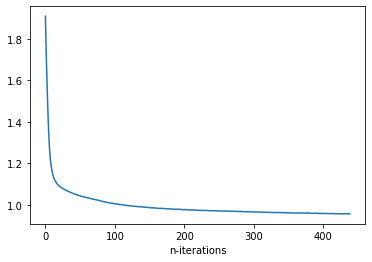

In [ ]:
print (wine_mlp.score(wine_x_train,wine_y_train))
plt.plot(wine_mlp.loss_curve_)
plt.xlabel('n-iterations')
print('Iterations: ', len(wine_mlp.loss_curve_))

### Evaluate the results of the model for multi-class classification

In [ ]:
#Build a variable report and use classification_report function
c_report = classification_report(wine_y_test, wine_mlp_predictions)

#print results
print("Classification report for classifier %s:\n%s\n"
      % (wine_mlp_predictions, c_report))

cfn_matrix = confusion_matrix(wine_y_test, wine_mlp_predictions)

print("Confusion matrix:\n%s" % cfn_matrix)

Classification report for classifier [5 6 6 ... 6 6 5]:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.30      0.05      0.09        55
           5       0.59      0.64      0.62       586
           6       0.54      0.64      0.58       801
           7       0.56      0.37      0.45       328
           8       0.00      0.00      0.00        44

    accuracy                           0.56      1820
   macro avg       0.33      0.28      0.29      1820
weighted avg       0.54      0.56      0.54      1820


Confusion matrix:
[[  0   1   3   2   0   0]
 [  1   3  32  18   1   0]
 [  2   3 376 203   2   0]
 [  0   3 214 512  72   0]
 [  0   0  10 196 122   0]
 [  0   0   0  22  22   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Define a function that plots the confusion matrix without normalization to verify if results are accurate or not
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:1.2f}".format(cm[i, j]),
                 horizontalalignment="center",
                 # For the purpose of having a clearer visualization, make only the largest values white
                 color="white" if cm[i, j] > 0.63 else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


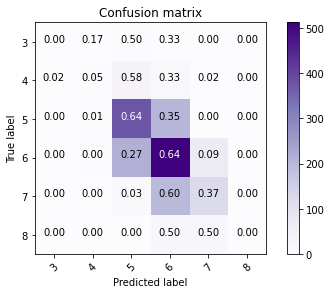

In [ ]:
#Plot the matrix
cnf_matrix = confusion_matrix(wine_y_test, wine_mlp_predictions)
plt.figure()

# Since we have very little examples for wines with a quality of 9, they do not figure in our analysis
plot_confusion_matrix(cnf_matrix, classes=['3', '4', '5', '6', '7', '8'], normalize=True)

### Model Evaluation

In [ ]:
print("Accuracy of wine quality classification with MLP: ", accuracy(cfn_matrix))

Accuracy of wine quality classification with MLP:  0.5565934065934066


The accuracy for the MLP for wine quality is 55.6%; these results are not as favorable as the ones we observed for the wine type classification. 

The prediction seems to do better for wines with a quality of 5 (64% of accuracy) and for wines with a quality of 6 (64%). Nevertheless, the model is biased towards predicting these two values even when the true ones are distinct ones. In particular, the model is biased towards predicting 5 even though the true quality values are 3 or 4; and it is also biased towards predicting 6 when the true values are 7 or 8. In other words, there are many false negatives around these central quality values.

This could be due to the nature of the dataset: There are more examples of wines with qualities of 5 & 6 for the model to train/test:

In [ ]:
# Validate the unique values that conform the "quality" feature
print(wine_data['quality'].value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64




> ## Alternative models



### K-Nearest Neighbors

A supervised, nearest-neighbors based learning to classify the data.

Its objective is to find a predefined number of training samples close in distance to the new point, and predict the label from them.

It is a non-generalizing machine learning method: it simply stores instances of the training data; classification is then computed from a simple majority vote of the nearest neighbors of each point.

In [ ]:
# KD Tree: tree-based data structures, Uniform weights: assign uniform weights to each neighbor
wine_knn = KNeighborsClassifier(n_neighbors=50, metric="euclidean", algorithm="kd_tree", weights='uniform')
wine_knn.fit(wine_x_train, wine_y_train)
wine_knn_predictions = wine_knn.predict(wine_x_test)

### Decision Tree

It is a non-parametric learning method, capable of performing multi-class classification. 

It is used to predict the value of a target variable by learning simple decision rules inferred from the data features; it can be used to gain insight on the relation between the features and the predicted data.


In [ ]:
# Gini criterion: to minimize the probability of misclassification
wine_tree = tree.DecisionTreeClassifier(criterion="gini", splitter="best", ccp_alpha=0.006)
wine_tree = wine_tree.fit(wine_x_train, wine_y_train)
wine_tree_predictions = wine_tree.predict(wine_x_test)

### Model Evaluation

In [ ]:
# Finally, we evaluate the accuracy of correct predictions for the alternative models
wine_knn_accuracy = metrics.accuracy_score(wine_y_test, wine_knn_predictions)
wine_tree_accuracy = metrics.accuracy_score(wine_y_test, wine_tree_predictions)

print("Accuracy of wine quality classification with K-Neighbors: ", wine_knn_accuracy)
print("Accuracy of wine quality classification with Decision Tree: ", wine_tree_accuracy)

Accuracy of wine quality classification with K-Neighbors:  0.5620879120879121
Accuracy of wine quality classification with Decision Tree:  0.5087912087912088


The accuracies for the alternative models' predictions are similar to the MLP results, they are not very precise:

*   K-Nearest Neighbors has an accuracy of 56%
*   Decision Tree has an accuracy of 51%
